Import Needed Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump
import seaborn as sns


Import data from databse

In [3]:
df = pd.read_csv("breast-cancer.csv")
pd.DataFrame(df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Data Visualization

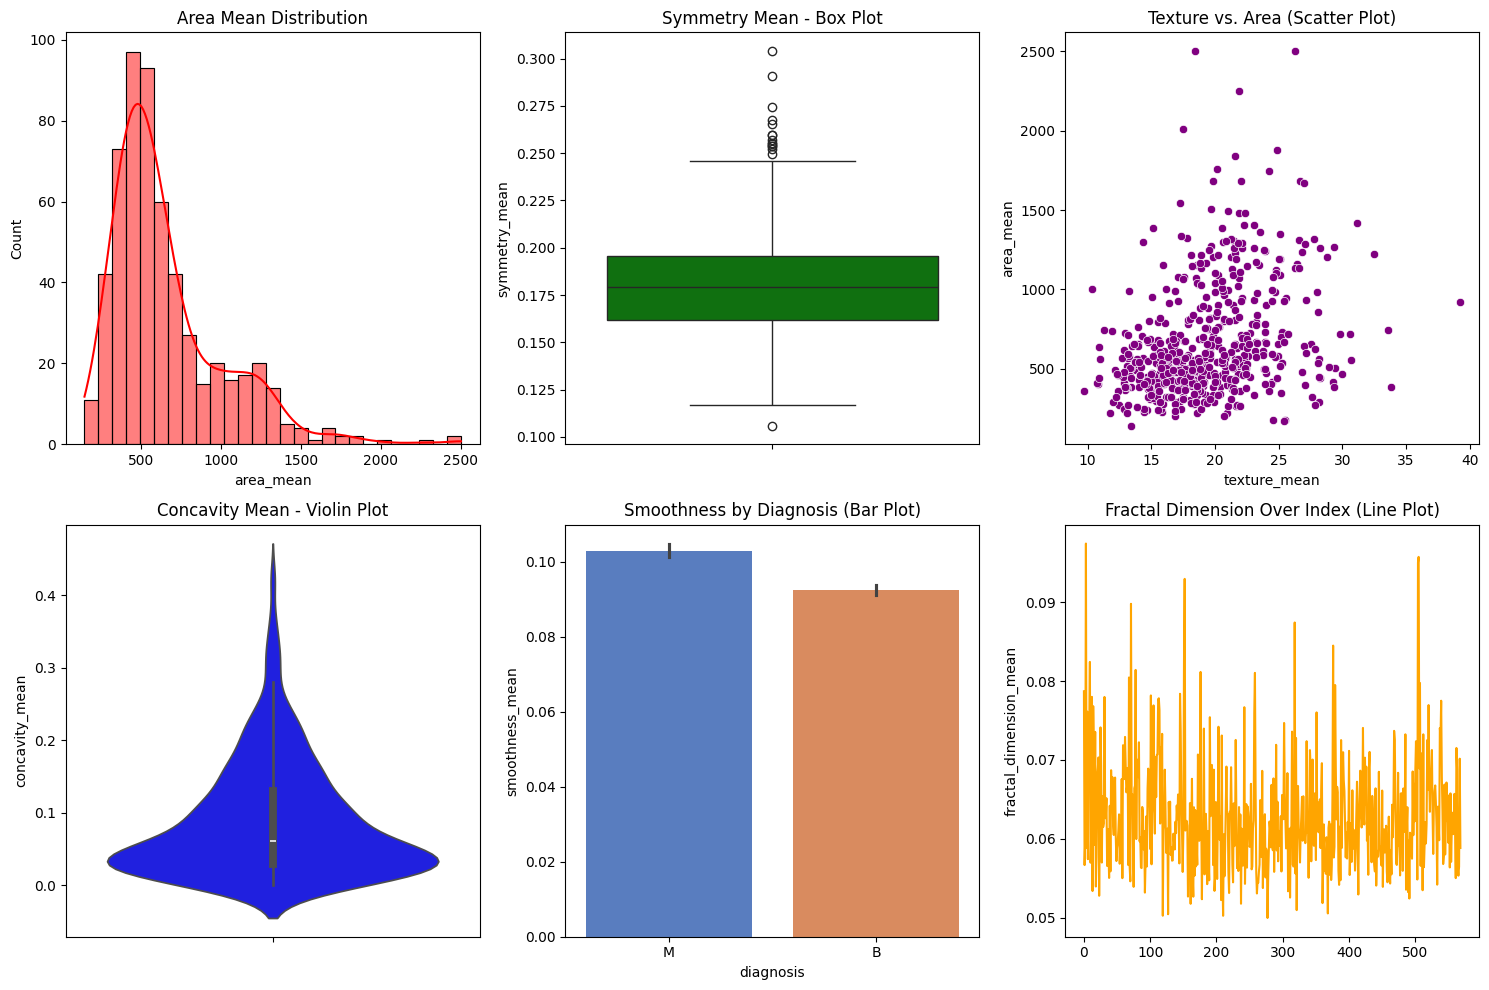

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create 2x3 subplots for visualizations
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Histogram with KDE
sns.histplot(df['area_mean'], ax=axs[0, 0], color='red', kde=True)
axs[0, 0].set_title('Area Mean Distribution')


# Box Plot (Symmetry Mean)
sns.boxplot(y=df['symmetry_mean'], ax=axs[0, 1], color='green')
axs[0, 1].set_title('Symmetry Mean - Box Plot')

# Violin Plot (Concavity Mean)
sns.violinplot(y=df['concavity_mean'], ax=axs[1, 0], color='blue')
axs[1, 0].set_title('Concavity Mean - Violin Plot')

# Scatter Plot (Texture Mean vs. Area Mean)
sns.scatterplot(x=df['texture_mean'], y=df['area_mean'], ax=axs[0, 2], color='purple')
axs[0, 2].set_title('Texture vs. Area (Scatter Plot)')

# Bar Plot (Smoothness Mean)
sns.barplot(x=df['diagnosis'], y=df['smoothness_mean'], ax=axs[1, 1], hue=df['diagnosis'], palette='muted', legend=False)
axs[1, 1].set_title('Smoothness by Diagnosis (Bar Plot)')


# Line Plot (Fractal Dimension)
sns.lineplot(x=range(len(df)), y=df['fractal_dimension_mean'], ax=axs[1, 2], color='orange')
axs[1, 2].set_title('Fractal Dimension Over Index (Line Plot)')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

Convert the Target Labels to Binary (0 and 1)

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Define the Target Variable and Split the Data

In [6]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

target = "diagnosis"
x = df.drop(target, axis=1)  # Exclude the target column from the features
y = df[target] #Target column
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=.80,stratify=y,random_state=42)

Train Model

In [7]:
# Initialize and train LightGBM classifier
dt = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=100
)

dt.fit(x_train, y_train)

# Predict on the test set
pred = dt.predict(x_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 170, number of negative: 285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4694
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373626 -> initscore=-0.516691
[LightGBM] [Info] Start training from score -0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\Elmua\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Elmua\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Elmua\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Elmua\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036

Evaluate the model


Accuracy Score: 0.97

Precision Score: 1.00

Recall Score: 0.93

F1 Score: 0.96



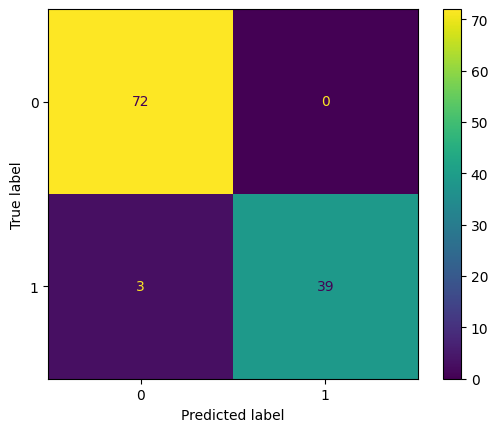

<Figure size 3000x2000 with 0 Axes>

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score\
    , recall_score, ConfusionMatrixDisplay, f1_score

accur_score = accuracy_score(y_test,pred)
prec_score = precision_score(y_test,pred)
rec_score = recall_score(y_test,pred)
f1_sc = f1_score(y_test,pred)
print(f"Accuracy Score: {accur_score:.2f}\n")
print(f"Precision Score: {prec_score:.2f}\n")
print(f"Recall Score: {rec_score:.2f}\n")
print(f"F1 Score: {f1_sc:.2f}\n")

#confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred = pred)
disp = ConfusionMatrixDisplay(cm, display_labels = dt.classes_)
disp.plot()
plt.show()    

# Plot the decision tree
plt.figure(figsize=(30,20))
plt.show()